# 3rd Party Dependencies in an IJava Notebook

The recommended way to add a dependency is through one of the IJava magics. This way all dependencies are visible in the notebook to make them more portable for others to use. If the dependencies is available via maven then one of the maven magics should be used but if that isn't the case the `%jars` magic is another option.

For some additional information see https://github.com/SpencerPark/IJava/blob/7f5aa9ab858859a010fd228364b080606399ae60/docs/magics.md.

### %jars

This _line magic_ takes a space separated list of simple glob patterns for resolving jar files. For example we can add all the jars in `/usr/share/java/` to the classpath and also display the found files.

In [ ]:
List<String> added = %jars /usr/share/java/*.jar
added

### %addMavenDependencies, %addMavenDependency, or %maven

These _line magics_ add maven artifacts to the notebook classpath. All transitive dependencies are also added to the classpath. If the artifact is not on maven central then make sure to add the repository with `%mavenRepo`. Dependencies are of the form `groupId:artifactId:[packagingType:[classifier]]:version`.

### %loadFromPOM and %%loadFromPOM

Load any dependencies specified in a POM. The cell magic is designed to make it very simple to copy and paste from any READMEs specifying maven POM fragments to use in depending on an artifact (including repositories other than central).

If used as a _line magic_ it accepts a POM to load dependencies from and optionally a list of scopes to import from. The scopes default to `compile`, `runtime`, `system`, and `import`.

When used as a _cell magic_ the scopes may be given as in the line magic but the body of the cell must be a _partial_ POM literal.

If the body is an xml `<project>` tag, then the body is used as a POM without being modified.

Otherwise, the magic attempts to build a POM based on the xml fragments it gets.

`<modelVersion>`, `<groupId>`, `<artifactId>`, and `<version>` are given default values if not supplied which there is no reason to supply other than if they happen to be what is copy-and-pasted.

All children of `<dependencies>` and `<repositories>` are collected **along with any loose `<dependency>` and `repository` tags**.

Ex: To add a dependency not in central simply add a valid `<repository>` and `<dependency>` and the magic will take care of putting it together into a POM.

In [ ]:
%%loadFromPOM
<repository>
  <id>oss-sonatype-snapshots</id>
  <url>https://oss.sonatype.org/content/repositories/snapshots/</url>
</repository>

<dependency>
  <groupId>io.github.spencerpark</groupId>
  <artifactId>jupyter-jvm-basekernel</artifactId>
  <version>2.0.0-SNAPSHOT</version>
</dependency>

# Quick chart example

Find a library you like such as https://github.com/knowm/XChart. Copy the dependency information specified in the README for installation as a maven artifact, put it in a `%%loadFromPOM` and we are good to go!

In [ ]:
%%loadFromPOM
<dependency>
    <groupId>org.knowm.xchart</groupId>
    <artifactId>xchart</artifactId>
    <version>3.5.2</version>
</dependency>

Another option is to collapse that into the short syntax and simply use the `%maven` line magic.

In [1]:
%maven org.knowm.xchart:xchart:3.5.2
import org.knowm.xchart.*;

Create a quick chart

In [2]:
double[] xData = new double[] { 0.0, 1.0, 2.0 };
double[] yData = new double[] { 2.0, 1.0, 0.0 };

XYChart chart = QuickChart.getChart("Sample Chart", "X", "Y", "y(x)", xData, yData);

Then render it inline!

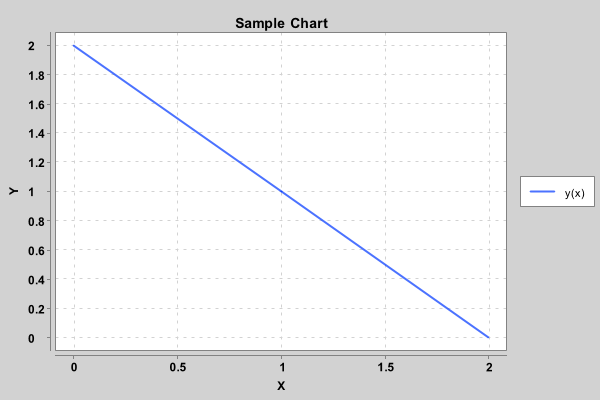

In [3]:
BitmapEncoder.getBufferedImage(chart);